**Loading the Dataset:**  
The dataset, `SaYoPillow.csv`, contains physiological and sleep-related data used to analyze and predict stress levels. This operation loads the dataset into a pandas DataFrame for further exploration and analysis.


In [1]:
import pandas as pd
# Load the SaYoPillow dataset into a pandas DataFrame for analysis
df_original = pd.read_csv('data/SaYoPillow.csv')

**Viewing Dataset Structure:**  
Displaying the first few rows of the dataset and its information helps understand its structure, column names, and sample data. Using `.info()` provides a summary of data types and non-null values to identify missing data and potential preprocessing needs.


In [2]:
# Display the first five rows of the dataset to understand its structure and contents
print(df_original.head())

      sr      rr       t      lm      bo    rem   sr.1     hr  sl
0  93.80  25.680  91.840  16.600  89.840  99.60  1.840  74.20   3
1  91.64  25.104  91.552  15.880  89.552  98.88  1.552  72.76   3
2  60.00  20.000  96.000  10.000  95.000  85.00  7.000  60.00   1
3  85.76  23.536  90.768  13.920  88.768  96.92  0.768  68.84   3
4  48.12  17.248  97.872   6.496  96.248  72.48  8.248  53.12   0


In [3]:
# Display dataset summary including data types and non-null value counts
print(df_original.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB
None


In [4]:
# Check for missing values in each column to identify data cleaning needs
print(df_original.isnull().sum())

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64


In [5]:
# Display the column names to understand the structure of the dataset
df_original.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

**Renaming Columns for Clarity:**  
The column names were updated to be more descriptive, improving readability and interpretability. This step ensures that each column name clearly reflects its data.

In [6]:
# Rename columns to more descriptive names for improved readability and clarity
df = df_original.rename(columns={
    'sr': 'snoring_range',
    'rr': 'respiration_rate',
    't': 'body_temperature',
    'lm': 'limb_movement_rate',
    'bo': 'blood_oxygen_level',
    'rem': 'eye_movement',
    'sr.1': 'hours_of_sleep',
    'hr': 'heart_rate',
    'sl': 'stress_level'
})

In [7]:
# Print updated column names to verify successful renaming
df.columns

Index(['snoring_range', 'respiration_rate', 'body_temperature',
       'limb_movement_rate', 'blood_oxygen_level', 'eye_movement',
       'hours_of_sleep', 'heart_rate', 'stress_level'],
      dtype='object')

**Analyzing the Distribution of Stress Levels:**  
Understanding the frequency distribution of stress levels helps assess class imbalances, which could affect model training. A bar chart provides a visual summary of the distribution.

stress_level
3    126
1    126
0    126
2    126
4    126
Name: count, dtype: int64


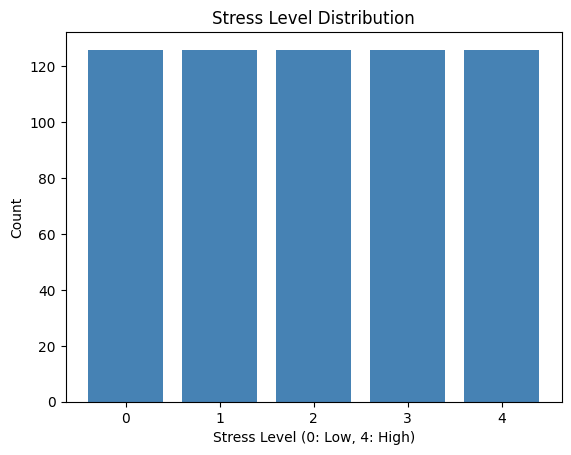

In [8]:
# Visualize the distribution of stress levels using a bar chart
print(df['stress_level'].value_counts())

# Visualize the distribution
import matplotlib.pyplot as plt

plt.bar(df['stress_level'].value_counts().index, df['stress_level'].value_counts().values, color='steelblue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level (0: Low, 4: High)')
plt.ylabel('Count')
plt.show()

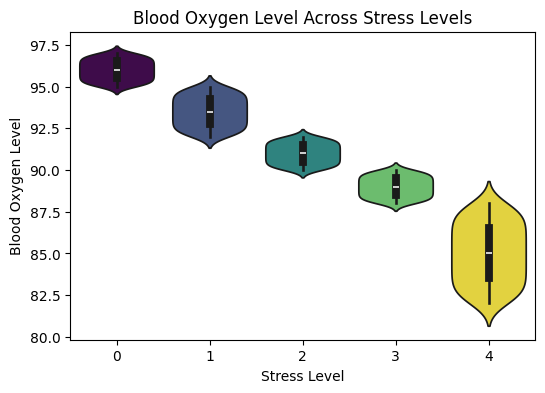

In [9]:
# Create a violin plot to visualize the distribution of blood oxygen levels across stress levels
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.violinplot(x='stress_level', y='blood_oxygen_level', hue='stress_level', data=df, palette='viridis', legend=False)
plt.title('Blood Oxygen Level Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Blood Oxygen Level')
plt.show()

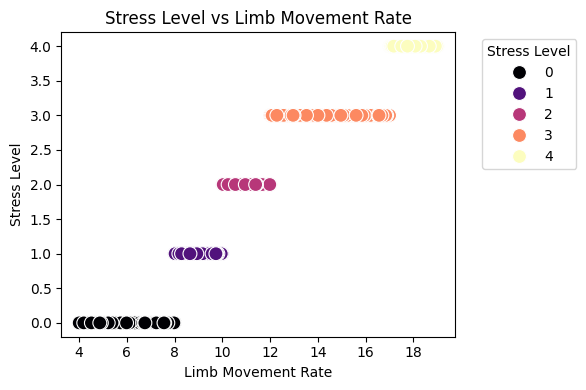

In [10]:
# Scatter plot for Limb Movement Rate vs Stress Level
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='limb_movement_rate', y='stress_level', hue='stress_level', palette='magma', s=100)
plt.title('Stress Level vs Limb Movement Rate')
plt.xlabel('Limb Movement Rate')
plt.ylabel('Stress Level')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

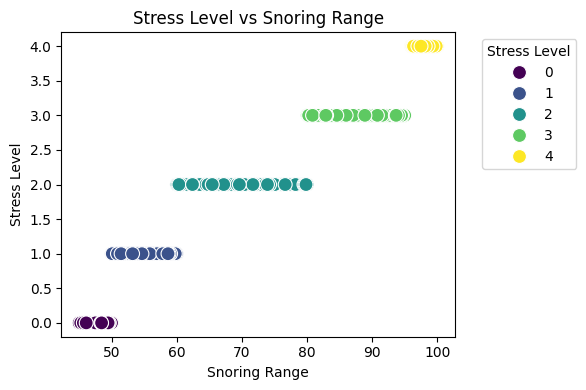

In [11]:
# Scatter plot to explore the relationship between snoring range and stress levels
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='snoring_range', y='stress_level', hue='stress_level', palette='viridis', s=100)
plt.title('Stress Level vs Snoring Range')
plt.xlabel('Snoring Range')
plt.ylabel('Stress Level')
plt.legend(title='Stress Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [12]:
# Define features (X) and target (y)
X = df.drop(columns=['stress_level'])
y = df['stress_level']

**Splitting the Dataset for Training and Testing:**
To ensure the machine learning models generalize well to unseen data, the dataset is split into training and testing sets. The training set (80% of the data) is used to train the models, while the testing set (20% of the data) evaluates their performance. This step is crucial for preventing overfitting and assessing the model's ability to handle new data.

In [13]:
# Split the data into training (80%) and testing (20%) sets for model training and evaluation
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (504, 8)
Testing set size: (126, 8)


**Training and Evaluating Random Forest Classifier:**
The Random Forest Classifier builds multiple decision trees and combines their outputs to improve accuracy.

Training: The model is trained on X_train and y_train.
Prediction: It predicts stress levels on X_test.
Evaluation:
Classification Report: Shows precision, recall, and F1-score.
Confusion Matrix: Displays correct and incorrect predictions.

In [14]:
# Training and Evaluating the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


**Training the Gradient Boosting Model:**  

Gradient Boosting is an ensemble learning algorithm that builds models sequentially, where each model corrects the errors of the previous one.

Initialization: The model is initialized with a fixed random state `(random_state=42)` for reproducibility.
Training: The model is trained on the training dataset `(X_train and y_train)` to minimize prediction errors iteratively.

In [15]:
# Training the Gradient Boosting Model:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Evaluating the Gradient Boosting Model**  
The Gradient Boosting model's performance is evaluated using metrics to assess its accuracy and effectiveness:

Prediction: The model predicts stress levels on the test set `(X_test)`.
Classification Report: Summarizes precision, recall, F1-score, and support for each stress level, providing detailed performance metrics.
Confusion Matrix: Visualizes the model’s correct and incorrect predictions, helping to identify strengths and weaknesses in classification.

In [16]:
# Evaluating the Gradient Boosting Model:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.93      1.00      0.97        28
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Confusion Matrix:
[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  1 25  0]
 [ 0  0  0  0 25]]


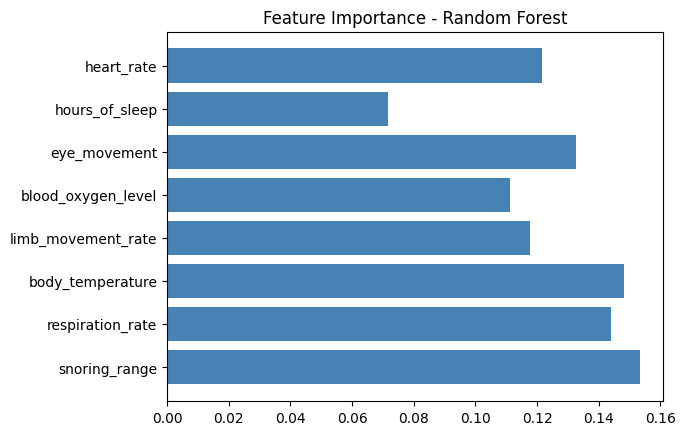

In [17]:
# Feature importance from Random Forest
rf_importance = rf_model.feature_importances_
plt.barh(X.columns, rf_importance, color='steelblue')
plt.title('Feature Importance - Random Forest')
plt.show()

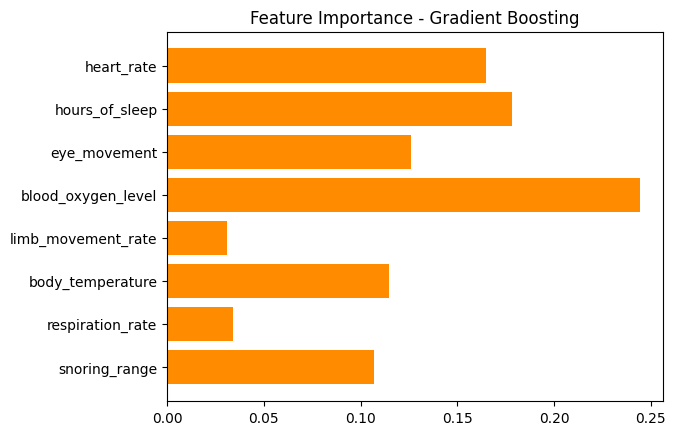

In [18]:
# Feature importance from Gradient Boosting
gb_importance = gb_model.feature_importances_
plt.barh(X.columns, gb_importance, color='darkorange')
plt.title('Feature Importance - Gradient Boosting')
plt.show()

**Exploring Correlations with Stress Levels:**  
The correlation matrix reveals relationships between features and stress levels. Visualizing these correlations highlights the most influential features for predicting stress levels.

Correlation with Stress Level:
 stress_level          1.000000
snoring_range         0.975322
limb_movement_rate    0.971071
heart_rate            0.963516
respiration_rate      0.963516
eye_movement          0.951988
blood_oxygen_level   -0.961092
body_temperature     -0.962354
hours_of_sleep       -0.973036
Name: stress_level, dtype: float64


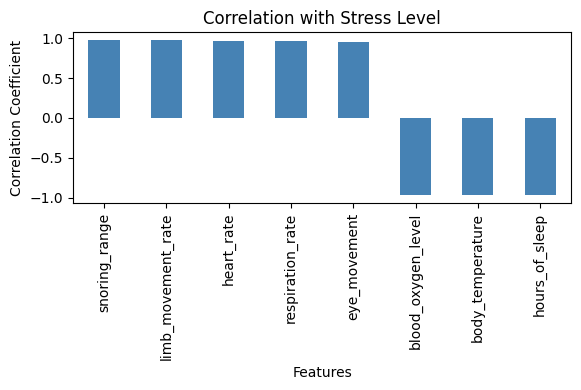

In [19]:
# Compute and Analyze the correlation matrix 
correlation_matrix = df.corr()

# Correlation with stress_level
correlation_with_stress = correlation_matrix['stress_level'].sort_values(ascending=False)
print("Correlation with Stress Level:\n", correlation_with_stress)

# Plot correlation of features with stress_level
plt.figure(figsize=(6, 4))
correlation_with_stress.drop('stress_level').plot(kind='bar', color='steelblue')
plt.title('Correlation with Stress Level')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [20]:
# Display correlation values with stress_level
correlation_with_stress = df.corr()['stress_level'].sort_values(ascending=False)
print("Correlation Values with Stress Level:\n")
print(correlation_with_stress)

Correlation Values with Stress Level:

stress_level          1.000000
snoring_range         0.975322
limb_movement_rate    0.971071
heart_rate            0.963516
respiration_rate      0.963516
eye_movement          0.951988
blood_oxygen_level   -0.961092
body_temperature     -0.962354
hours_of_sleep       -0.973036
Name: stress_level, dtype: float64


In [21]:
# Top positively correlated features
print("Top Positive Correlations with Stress Level:")
print(correlation_with_stress.head(4))  # Top 3 positively correlated + Stress Level itself

# Top negatively correlated features
print("\nTop Negative Correlations with Stress Level:")
print(correlation_with_stress.tail(3))  # Top 3 negatively correlated

Top Positive Correlations with Stress Level:
stress_level          1.000000
snoring_range         0.975322
limb_movement_rate    0.971071
heart_rate            0.963516
Name: stress_level, dtype: float64

Top Negative Correlations with Stress Level:
blood_oxygen_level   -0.961092
body_temperature     -0.962354
hours_of_sleep       -0.973036
Name: stress_level, dtype: float64


In [22]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = df.drop(columns=['stress_level'])
y = df['stress_level']

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Set up Stratified K-Fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=kfold, scoring='accuracy')

# Print results
print("Cross-Validation Accuracy for each fold:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Accuracy for each fold: [0.97619048 1.         1.         0.99206349 0.98412698]
Mean Accuracy: 0.9904761904761905
Standard Deviation: 0.00925547919816716


C:\Users\HP1\AppData\Local\Temp\ipykernel_23944\595226790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stress_level', y='heart_rate', data=df, palette='coolwarm')


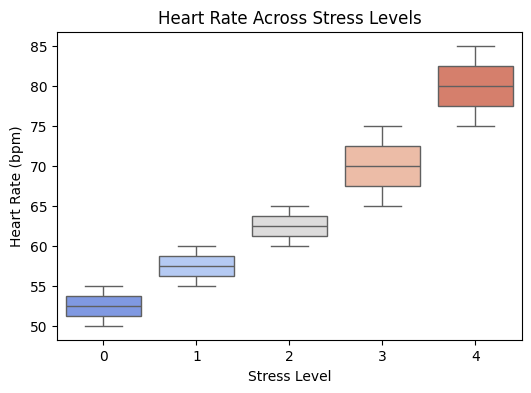

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x='stress_level', y='heart_rate', data=df, palette='coolwarm')
plt.title('Heart Rate Across Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Heart Rate (bpm)')
plt.show()